# California Housing Price Analysis

# Data Preprocessing

In [1160]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [1161]:
df = pd.read_csv(r"D:\Data Analytics\Python Scripts\Statistics\Assignment\housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [1162]:

df.fillna(df['total_bedrooms'].median(), inplace = True)
df.drop(['ocean_proximity','latitude','housing_median_age'],axis=1, inplace=True)
df.dropna(inplace = True)
df

,longitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,-121.09,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [1163]:
df.describe()

,longitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Standarisation

In [1164]:
df_columns = [
    "median_income",
    "median_house_value",
]

for i in df_columns:
    mhp_mean = df[i].mean()
    mhp_std = df[i].std()

    df[i+'_zscore'] = (df[i] - mhp_mean) / mhp_std

    df[[i, i+'_zscore']].head()

    

### Outlier Detection 

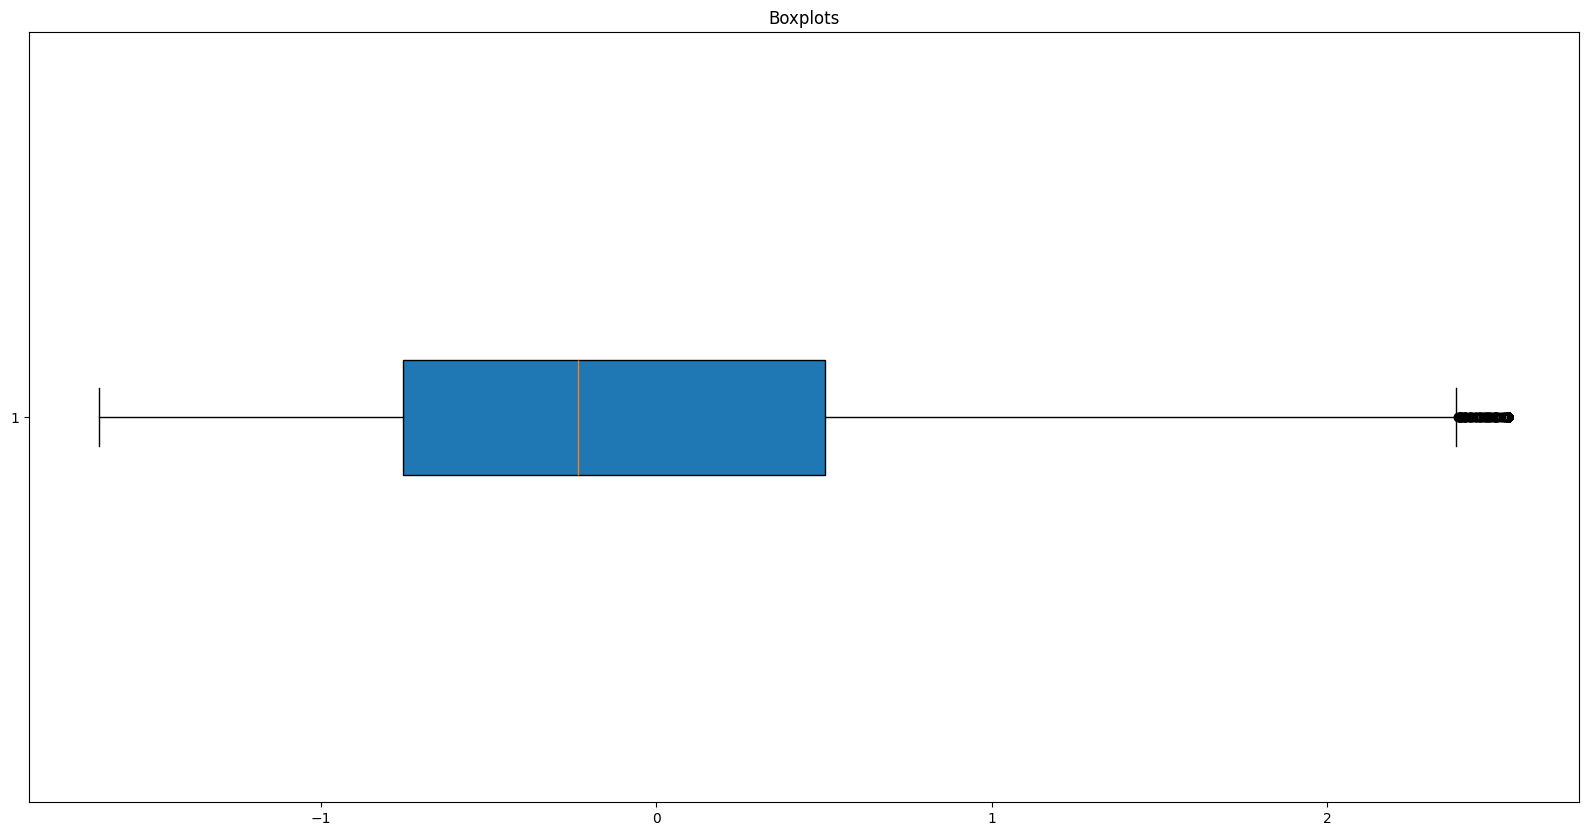

In [1165]:
plt.figure(figsize=(20,10))
plt.boxplot(df['median_house_value_zscore'], vert=False, patch_artist="True")
plt.title('Boxplots')
plt.show()

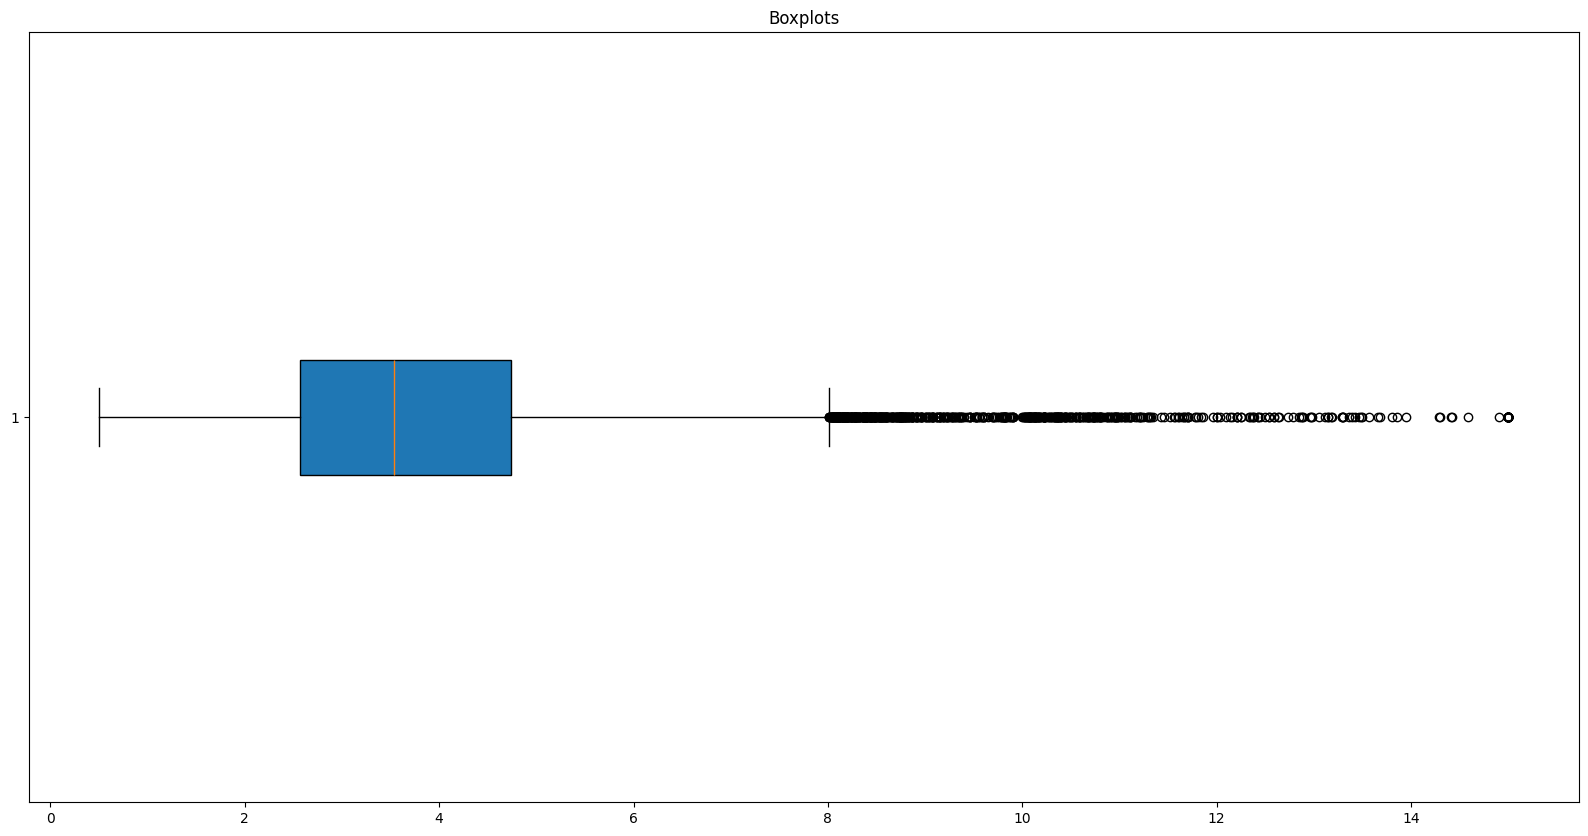

In [1166]:
plt.figure(figsize=(20,10))
plt.boxplot(df['median_income'], vert=False, patch_artist="True")
plt.title('Boxplots')
plt.show()

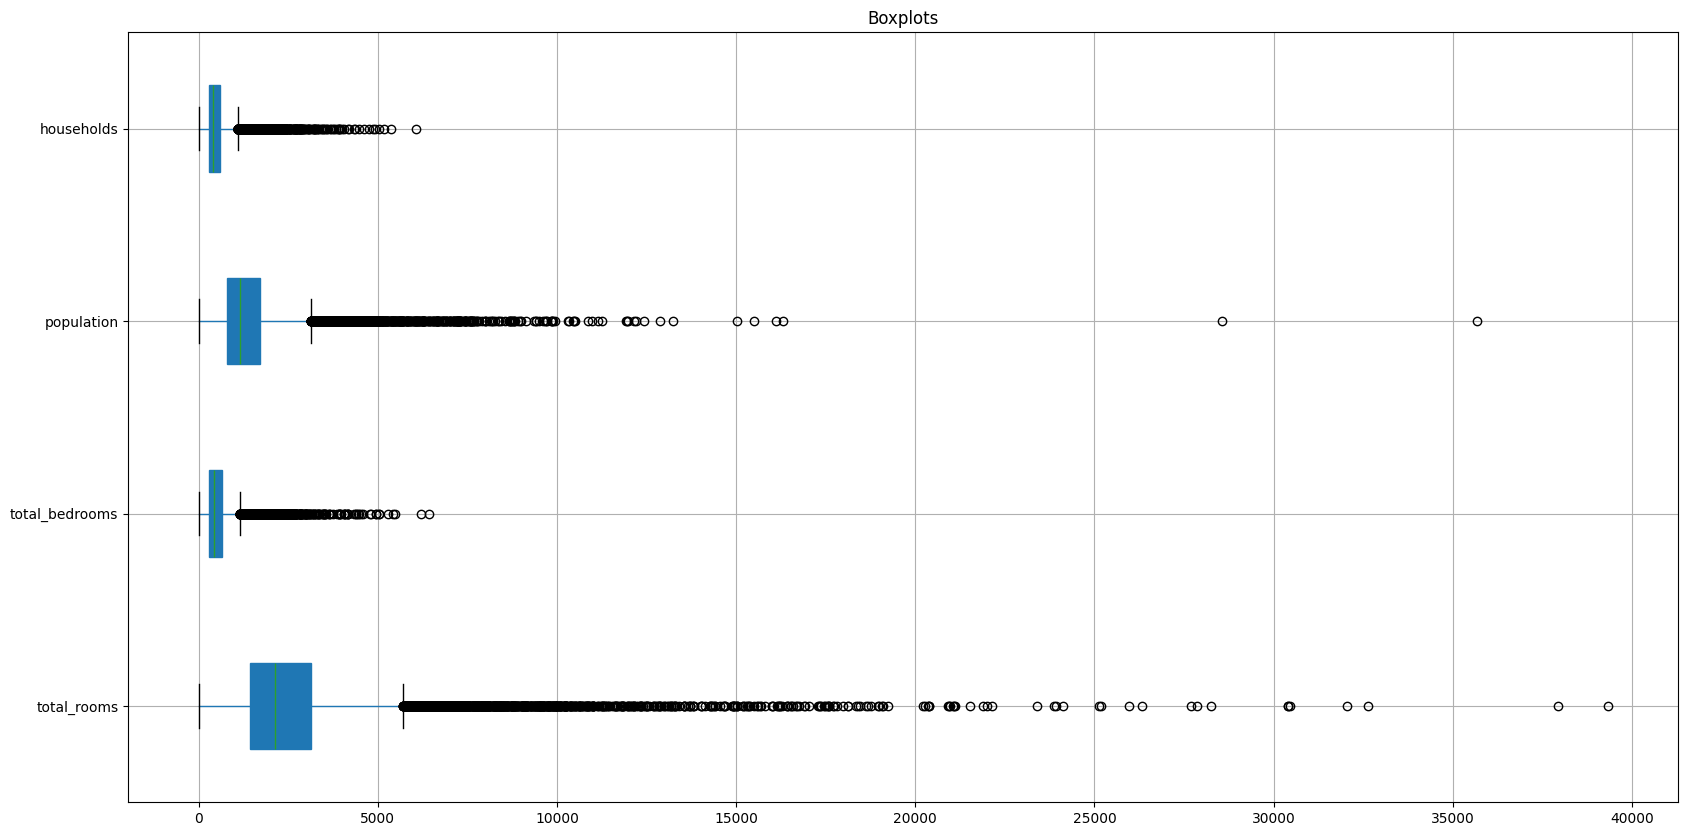

In [1167]:
df.loc[
    :,
    [
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
    ],
].boxplot(vert=False, patch_artist="True", figsize=(20, 10))

plt.title("Boxplots")
plt.show()

## Outlier Handling

In [1168]:
df_columns = [
    "median_income_zscore",
    "median_income",
    "median_house_value",
    "median_house_value_zscore",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
]

for i in df_columns:
    upper_limit = df[i].quantile(0.90)
    Lower_limit = df[i].quantile(0.01)
    df = df[(df[i] < upper_limit) & (df[i] > Lower_limit)]

In [1169]:
df.describe()

,longitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_zscore,median_house_value_zscore
count,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000,8097.000000
mean,-119.577760,1678.028653,354.869581,988.440287,330.304063,3.122832,141704.841299,-0.393637,-0.564588
std,1.995491,619.599916,119.228431,357.923249,108.127138,0.973969,50601.552602,0.512663,0.438505
min,-124.350000,210.000000,84.000000,233.000000,99.000000,1.243400,54300.000000,-1.382904,-1.322024
25%,-121.460000,1221.000000,266.000000,721.000000,249.000000,2.333300,97600.000000,-0.809219,-0.946793
50%,-118.870000,1637.000000,351.000000,970.000000,330.000000,3.068200,141100.000000,-0.422393,-0.569829
75%,-118.030000,2095.000000,442.000000,1243.000000,414.000000,3.867600,181500.000000,-0.001616,-0.219729
max,-114.560000,4195.000000,725.000000,1847.000000,540.000000,5.190900,242400.000000,0.694923,0.308020


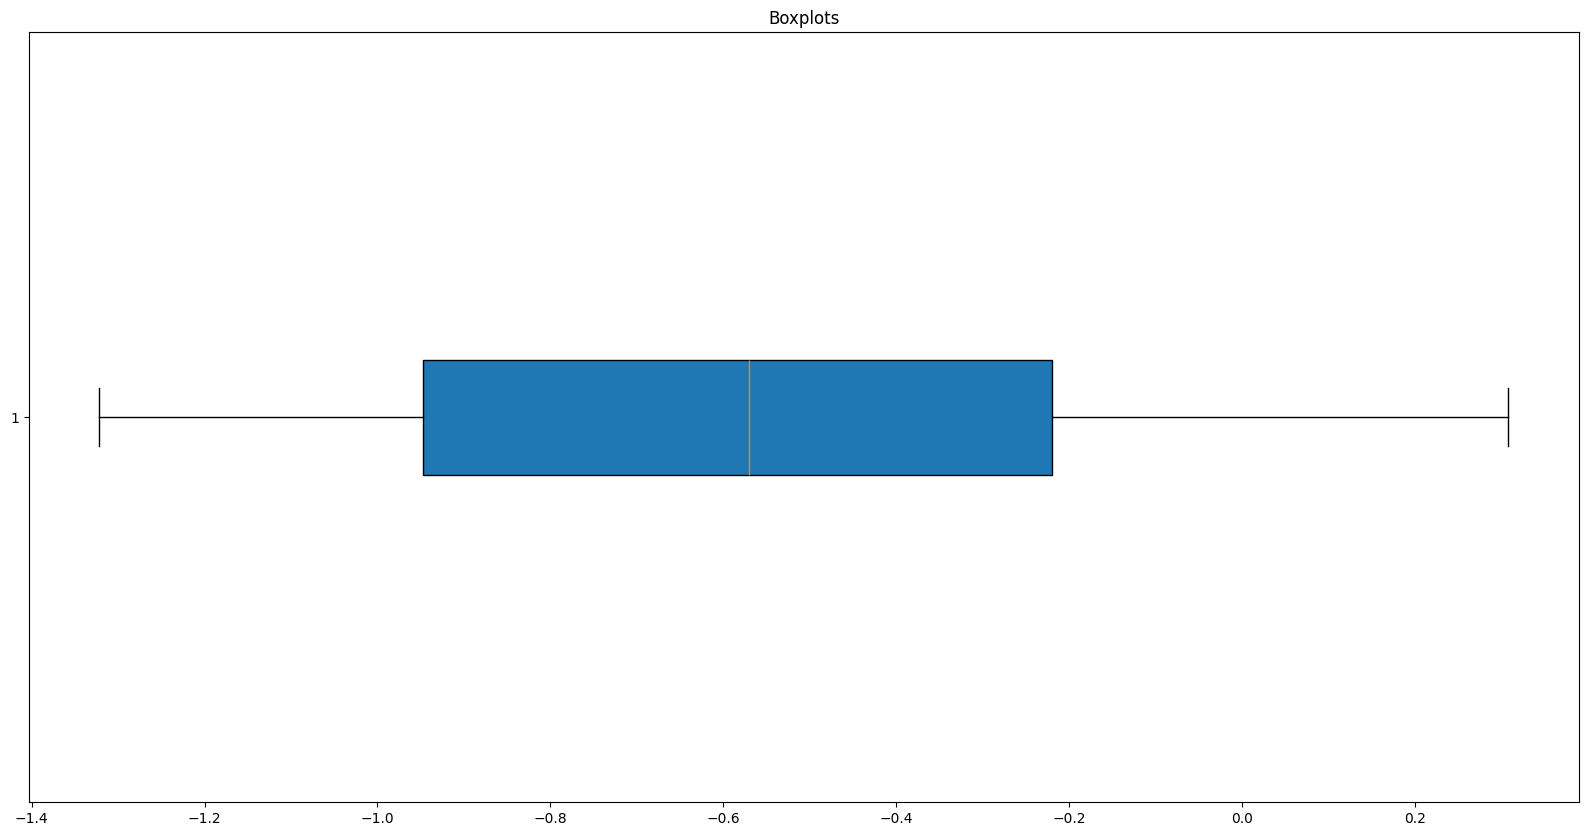

In [1170]:
plt.figure(figsize=(20,10))
plt.boxplot(df['median_house_value_zscore'], vert=False, patch_artist="True")

plt.title('Boxplots')
plt.show()

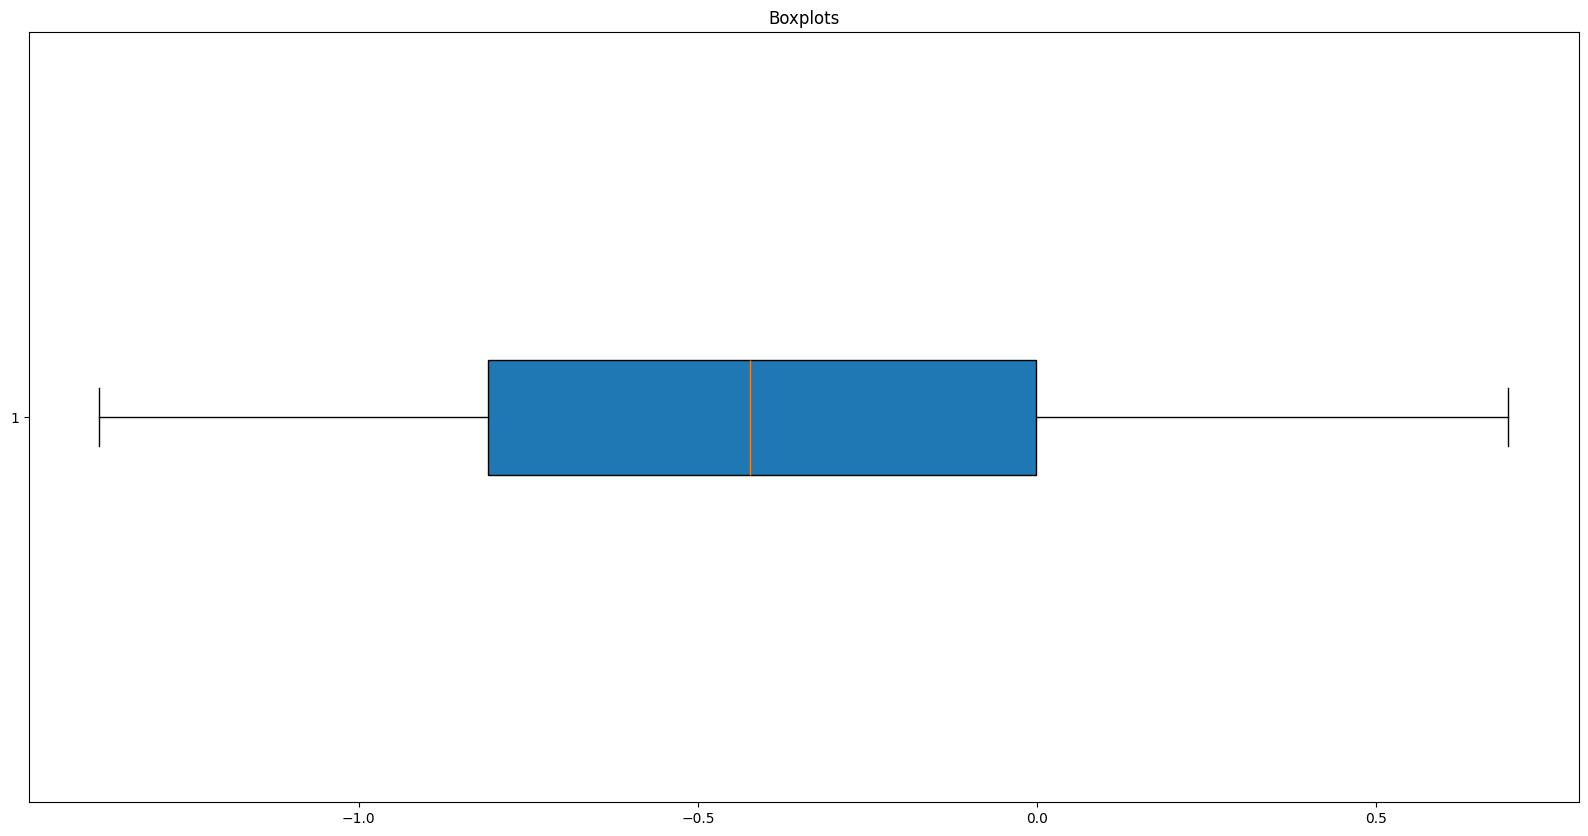

In [1171]:
plt.figure(figsize=(20,10))
plt.boxplot(df['median_income_zscore'], vert=False, patch_artist="True")

plt.title('Boxplots')
plt.show()

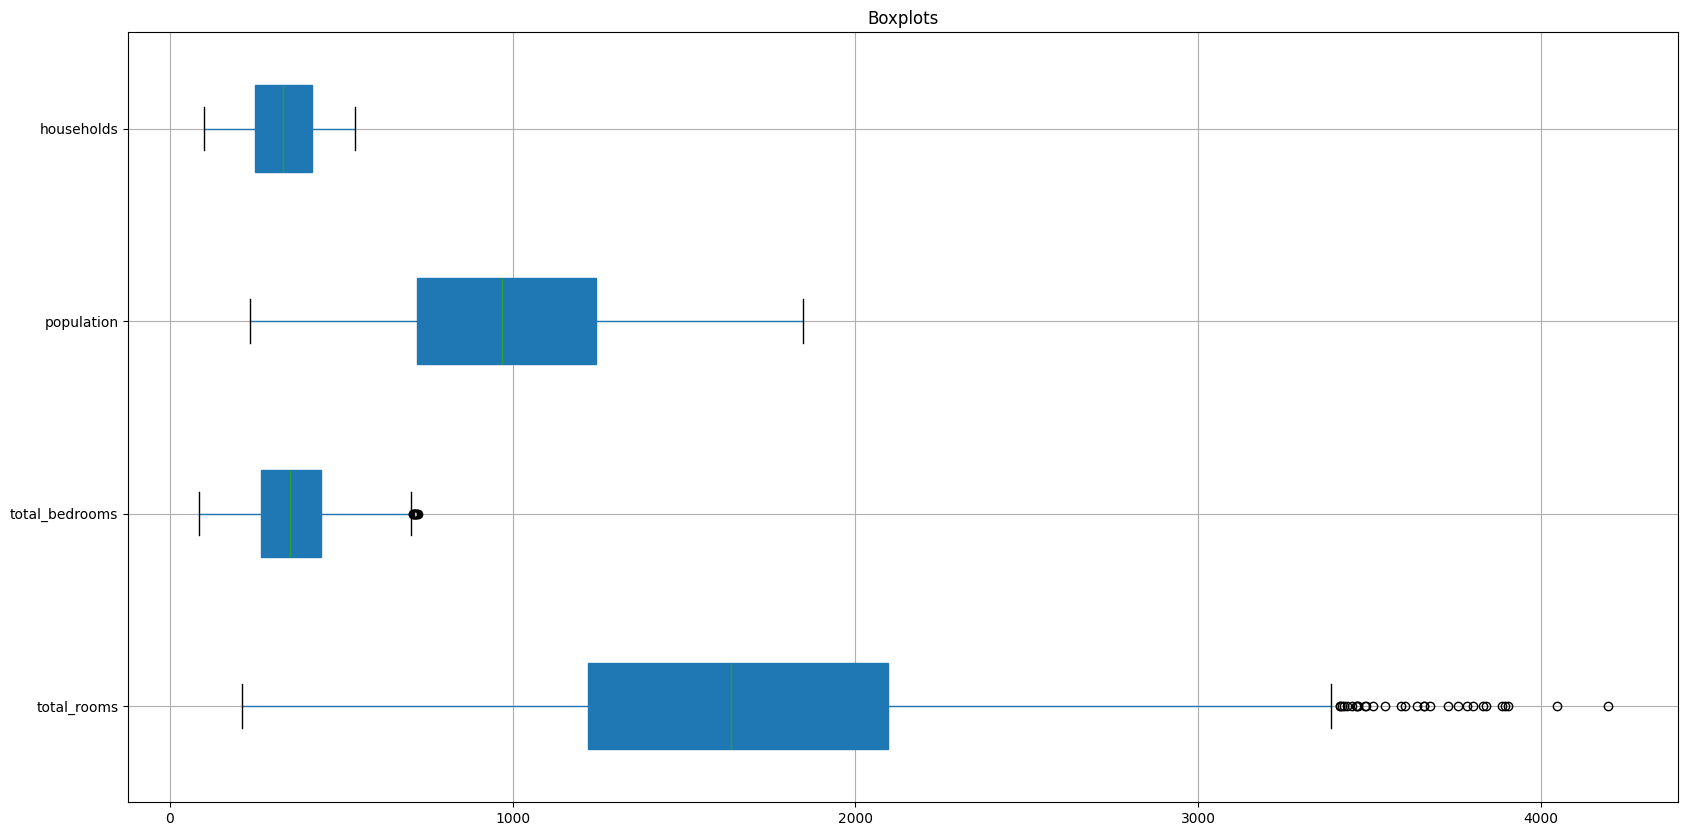

In [1172]:
df.loc[
    :,[
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
    ],
].boxplot(vert=False, patch_artist="True", figsize=(20, 10))

plt.title("Boxplots")
plt.show()

In [1173]:
upper_limit = df['total_bedrooms'].quantile(0.99)
Lower_limit = df['total_bedrooms'].quantile(0.01)
df = df[(df['total_bedrooms'] < upper_limit) & (df['total_bedrooms'] > Lower_limit)]
upper_limit = df['total_rooms'].quantile(0.99)
Lower_limit = df['total_rooms'].quantile(0.01)
df = df[(df['total_rooms'] < upper_limit) & (df['total_rooms'] > Lower_limit)]

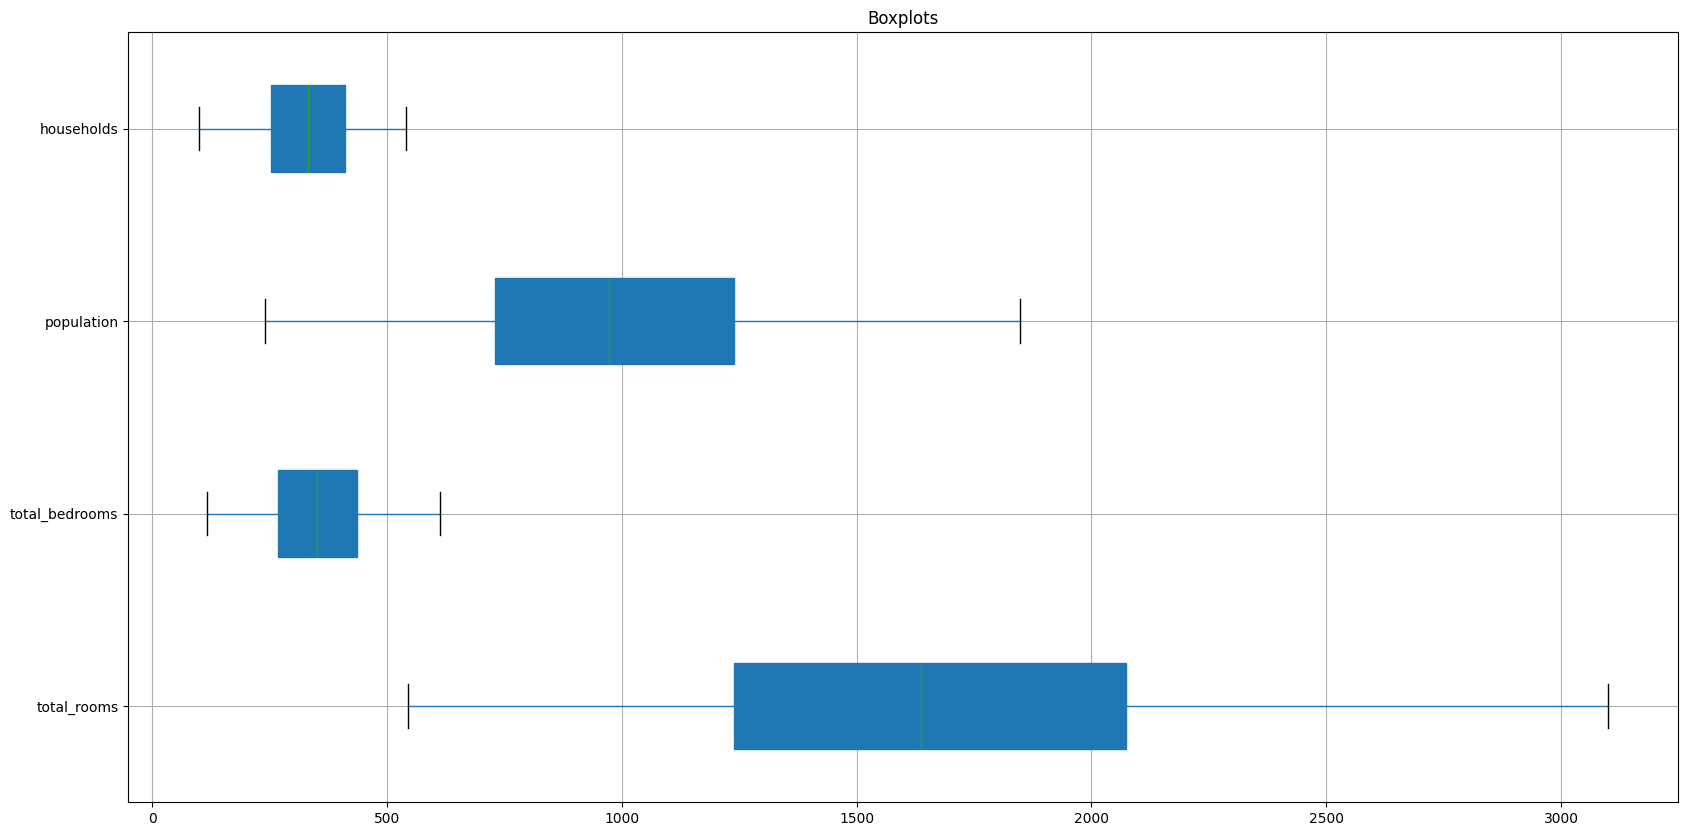

In [1174]:
df.loc[
    :,[
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
    ],
].boxplot(vert=False, patch_artist="True", figsize=(20, 10))

plt.title("Boxplots")
plt.show()

In [1175]:
df.loc[
    :,
    [
        "longitude",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income",
        "median_house_value_zscore",
    ],
].describe()


,longitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value_zscore
count,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000,7772.000000
mean,-119.582867,1673.153242,354.333891,993.722337,331.844313,3.124360,-0.564499
std,1.998070,567.650858,111.449967,348.910010,103.551835,0.969522,0.440092
min,-124.350000,545.000000,118.000000,240.000000,99.000000,1.243400,-1.322024
25%,-121.470000,1239.000000,269.000000,730.000000,253.000000,2.338200,-0.948527
50%,-118.870000,1637.000000,351.000000,973.000000,331.000000,3.069400,-0.568963
75%,-118.030000,2073.000000,437.000000,1239.000000,411.000000,3.863125,-0.217130
max,-114.560000,3099.000000,614.000000,1847.000000,540.000000,5.190900,0.308020


## Feature Selection

In [1176]:
corr = df.loc[
    :,
    [
        "longitude",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_income",
        "median_house_value_zscore",
    ],
].corr()

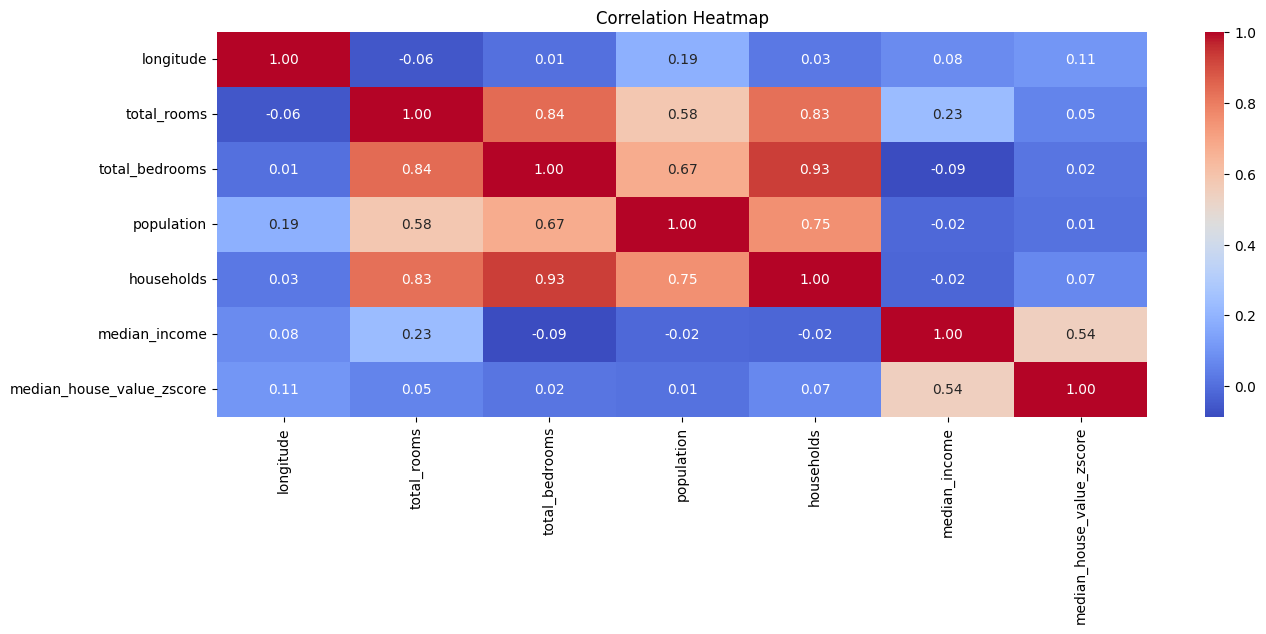

In [1177]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [1178]:
df

,longitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_zscore,median_house_value_zscore
12,-122.26,2491.0,474.0,1098.0,468.0,3.0750,213500.0,-0.418814,0.057577
13,-122.26,696.0,191.0,345.0,174.0,2.6736,191300.0,-0.630096,-0.134804
15,-122.26,1120.0,283.0,697.0,264.0,2.1250,140000.0,-0.918860,-0.579362
16,-122.27,1966.0,347.0,793.0,331.0,2.7750,152500.0,-0.576723,-0.471039
17,-122.27,1228.0,293.0,648.0,303.0,2.1202,155500.0,-0.921387,-0.445041
...,...,...,...,...,...,...,...,...,...
20634,-121.56,2332.0,395.0,1041.0,344.0,3.7125,116800.0,-0.083256,-0.780409
20635,-121.09,1665.0,374.0,845.0,330.0,1.5603,78100.0,-1.216099,-1.115777
20636,-121.21,697.0,150.0,356.0,114.0,2.5568,77100.0,-0.691576,-1.124443
20637,-121.22,2254.0,485.0,1007.0,433.0,1.7000,92300.0,-1.142566,-0.992722


# Simple Linear Regression

In [1179]:
import math


class LRGD:
    def __init__(self, learning_rate, epochs):
        self.beta_ = 1
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        self.sample_size = 0

    def fitgd(self, X, Y):
        self.sample_size = X.shape[0]
        for i in range(self.epochs):
            loss_funct_b = -2 * np.sum(Y - self.beta_ * X- self.b)
            # print(loss_funct_b)
            loss_funct_beta_ = -2 * np.sum((Y - self.beta_ * X - self.b)*X)
            step_size_beta_ = loss_funct_beta_*self.lr
            step_size_b = loss_funct_b * self.lr
            self.b = self.b - step_size_b
            self.beta_ = self.beta_ - step_size_beta_
        return self.beta_ , self.b

    def predictgd(self, X):
        y_predict = (X * self.beta_ + self.b)
        return y_predict

In [1180]:

X = df.iloc[:,-2].values
Y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
X_train.shape





(6217,)

In [1181]:
lr = LRGD(0.0001,50)
lr.fitgd(X_train,y_train)
lr_pred = lr.predictgd(X_test) 
lr.beta_, lr.b

(0.46989223331777374, -0.3816645378616151)

In [1182]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression()
reg_lr.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))
reg_lr_pred = reg_lr.predict(X_test.reshape(-1, 1))
reg_lr.coef_, reg_lr.intercept_

(array([[0.46989216]]), array([-0.38166458]))

In [1183]:
from sklearn.metrics import r2_score
r2_score(y_test,reg_lr_pred)

0.2735931412973295

In [1184]:
n = y_test.shape[0]
k=1

num = np.sum((y_test - lr_pred)*(y_test -lr_pred))
mean = np.mean(y_test)
deno = np.sum((y_test - mean)*(y_test - mean))

r2 = 1-(num/deno)
adjusted_r2 = 1 - ((((1 - r2*r2)) / (n - k - 1))*(n-1))

print(f"r2_score : {r2}\nadjusted_r2_score = {adjusted_r2}")

r2_score : 0.27359313952338593
adjusted_r2_score = 0.07425749009342208


In [1185]:
df_match = pd.DataFrame(y_test)
df_pred=pd.DataFrame(lr_pred)
df_match[1]=df_pred
df_match

,0,1
0,-0.167734,-0.703811
1,-1.238832,-0.806876
2,-0.119206,-0.378764
3,-0.196332,-0.390116
4,-0.971058,-0.923568
...,...,...
1550,-1.106245,-0.784566
1551,-1.023053,-0.721570
1552,-0.678152,-0.664460
1553,-0.503102,-0.591867


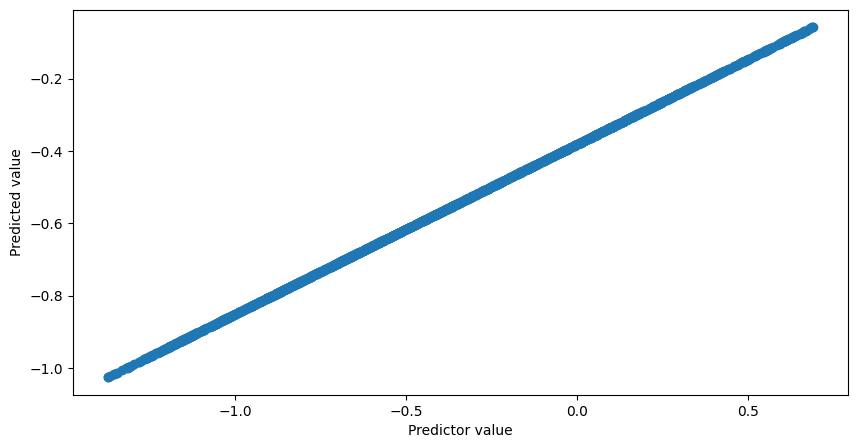

In [1186]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, lr_pred)
plt.xlabel('Predictor value')
plt.ylabel('Predicted value')
plt.show()

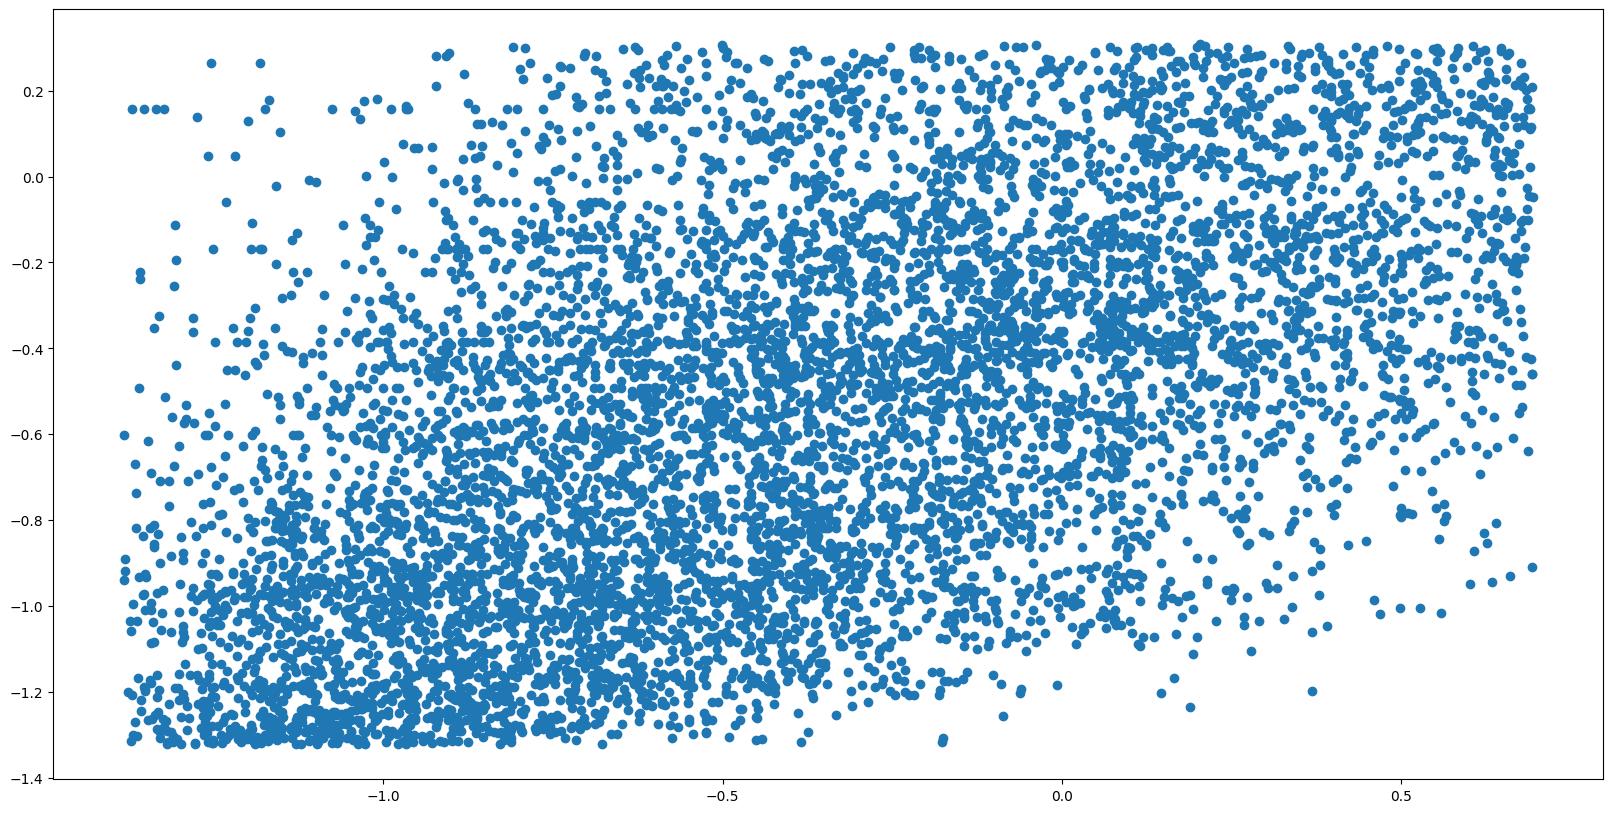

In [1187]:
plt.figure(figsize=(20,10))
plt.scatter(df['median_income_zscore'],df['median_house_value_zscore'])
plt.show()

In [1188]:
X_train.shape

(6217,)

# Multiple Linear Regression

In [1189]:
class MLR_GD:
    def __init__(self, learning_rate, epochs):
        self.intercept_ = 0
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit_gd(self, X, Y):
        self.coef_ = np.ones(X.shape[1])
        for i in range(self.epochs):
            Y_hat = np.dot(X, self.coef_) + self.intercept_
            intercept_Loss_funct = -2 * np.mean(Y - Y_hat)
            self.intercept_ = self.intercept_ - self.lr * intercept_Loss_funct
            coef_loss_funct = -2 * np.dot((Y - Y_hat), X) / X.shape[0]
            self.coef_ = self.coef_ - self.lr * coef_loss_funct
        return self.coef_, self.intercept_

    def predict_gd(self, X):
        Y = np.dot(X, self.coef_) + self.intercept_
        return Y

In [1190]:
P = df.loc[
    :,
    [
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
    ],
]

Q = df.loc[:,'median_house_value_zscore']


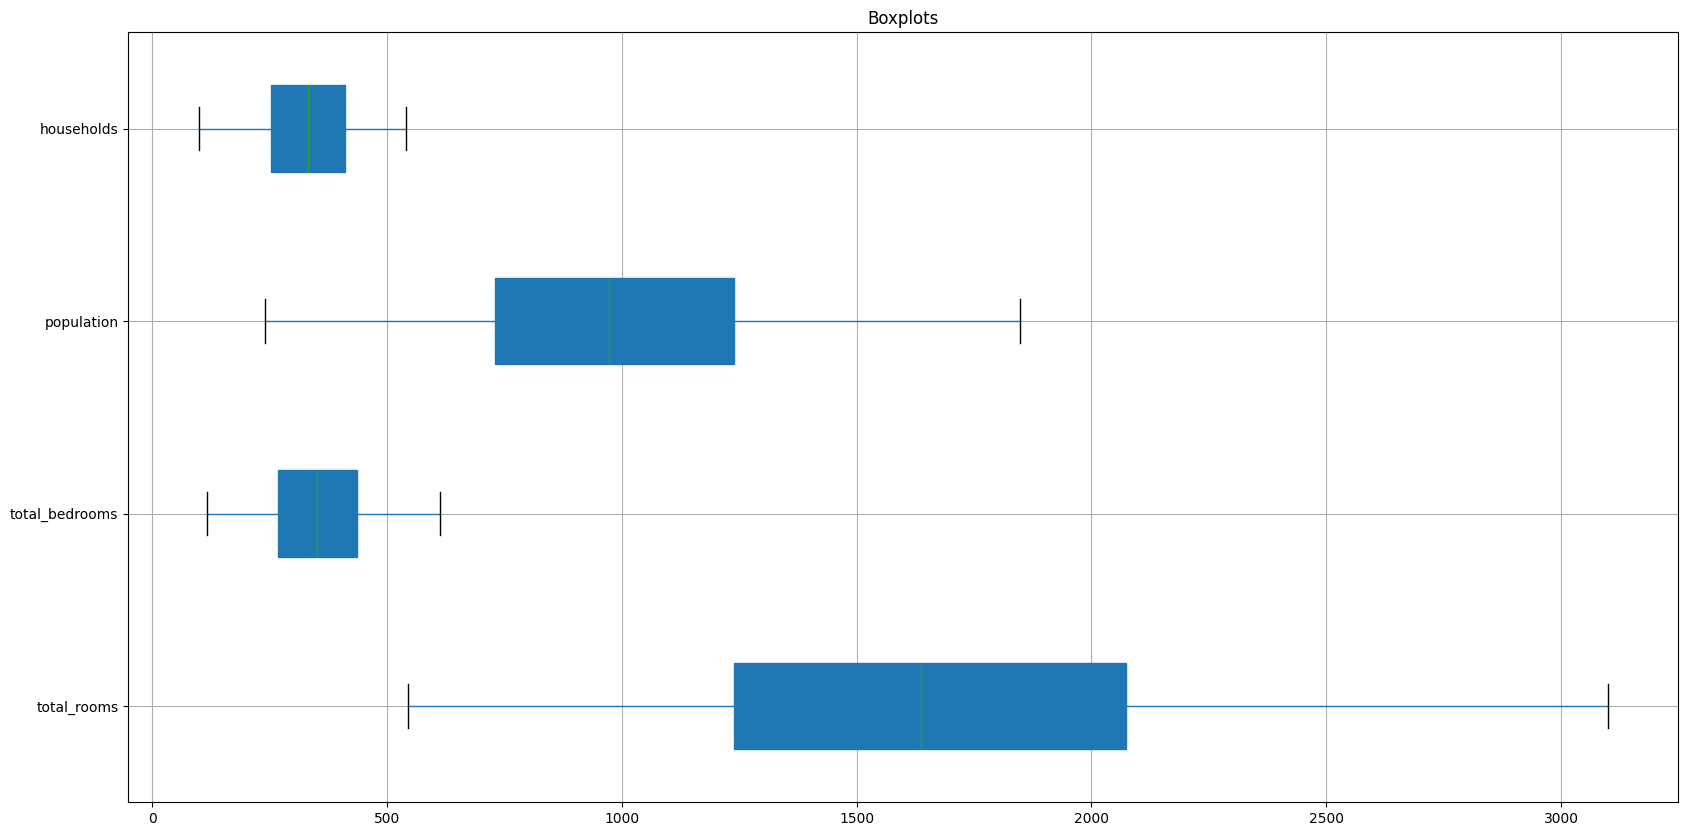

In [1191]:
df.loc[
    :,[
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
    ],
].boxplot(vert=False, patch_artist="True", figsize=(20, 10))

plt.title("Boxplots")
plt.show()

In [1192]:
df.loc[
    :,[
        "longitude",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
    ],
]

,longitude,total_rooms,total_bedrooms,population,households
12,-122.26,2491.0,474.0,1098.0,468.0
13,-122.26,696.0,191.0,345.0,174.0
15,-122.26,1120.0,283.0,697.0,264.0
16,-122.27,1966.0,347.0,793.0,331.0
17,-122.27,1228.0,293.0,648.0,303.0
...,...,...,...,...,...
20634,-121.56,2332.0,395.0,1041.0,344.0
20635,-121.09,1665.0,374.0,845.0,330.0
20636,-121.21,697.0,150.0,356.0,114.0
20637,-121.22,2254.0,485.0,1007.0,433.0


In [1193]:
Xtrain, Xtest, ytrain, ytest = train_test_split(P, Q, test_size=0.2, random_state=2)

In [1194]:
Xtrain.shape , y_train.shape

((6217, 4), (6217,))

In [1217]:
mlr = MLR_GD(0.0000005,100)
mlr.fit_gd(Xtrain, ytrain)
mlr_pred = mlr.predict_gd(Xtest)
mlr.coef_, mlr.intercept_

(array([6.74052215e+53, 1.40463349e+53, 3.92242323e+53, 1.31543404e+53]),
 3.638275171872674e+50)

In [1196]:
from sklearn.linear_model import LinearRegression
reg_mlr = LinearRegression()
reg_mlr.fit(Xtrain,ytrain)
reg_mlr_pred = reg_mlr.predict(Xtest)
reg_mlr.coef_, reg_mlr.intercept_

(array([ 5.51225737e-05, -1.65473068e-03, -1.19346929e-04,  1.98222166e-03]),
 -0.6112905298813424)

In [1197]:
from sklearn.metrics import r2_score
r2_score(ytest,reg_mlr_pred)

0.0316850143782994

In [1198]:
n = ytest.shape[0]
k = 5

num = np.sum((ytest - mlr_pred) * (ytest -mlr_pred))
mean = np.mean(ytest)
deno = np.sum((ytest - mean) * (ytest - mean))

r2 = 1 - (num / deno)
adjusted_r2 = 1 - ((((1 - r2 * r2)) / (n - k - 1)) * (n - 1))
adjusted_r2, r2
print(f"r2_score : {r2}\nadjusted_r2_score = {adjusted_r2}")

r2_score : -inf
adjusted_r2_score = inf
